# Prediction using Supervised ML
Simple linear regression using sci-kit learn and statsmodels involving two variables Hours and Scores to predict student performance.
#The objective of linear regression model is to find a relationship between independent variable(Hours) and dependent variable(Scores).

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
sp = pd.read_csv(url)

sp.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Dimension of Dataframe
sp.shape

(25, 2)

In [45]:
#Coinsise summary of Dataframe 
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Hours    25 non-null     float64
 1   Scores   25 non-null     int64  
 2   predict  25 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 728.0 bytes


In [46]:
#Statistical information of given data
sp.describe()

,Hours,Scores,predict
count,25.000000,25.000000,25.000000
mean,5.012000,51.480000,51.480000
std,2.525094,25.286887,24.684823
min,1.100000,17.000000,13.237057
25%,2.700000,30.000000,28.878343
50%,4.800000,47.000000,49.407530
75%,7.400000,75.000000,74.824618
max,9.200000,95.000000,92.421065


In [6]:
#total no. of null values
sp.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#total no. of values in Hours and Scores
sp.count()

Hours     25
Scores    25
dtype: int64

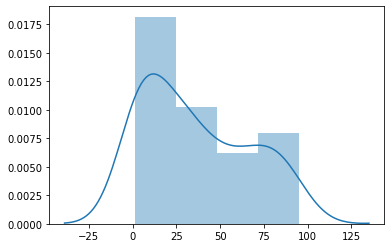

In [53]:
#bivariate distribution of data
sns.distplot(sp)

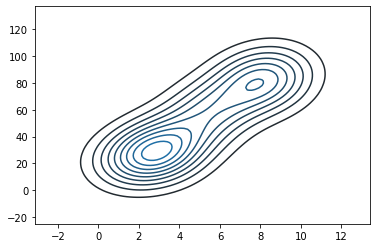

In [58]:
#KDE represents the data using a continuous probability density curve in one or more dimensions.
sns.kdeplot(sp)

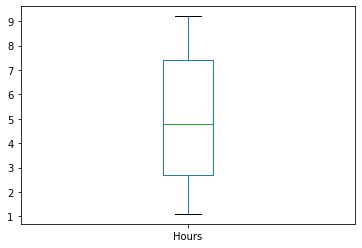

In [48]:
#five no. of summary
#A box plot is a method for graphically depicting groups of numerical data through their quartiles.
#The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2)
sp['Hours'].plot.box()

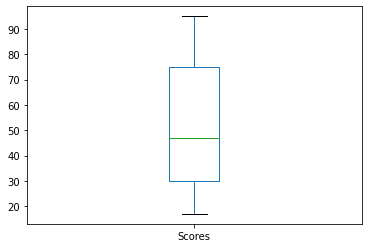

In [9]:
sp['Scores'].plot.box()

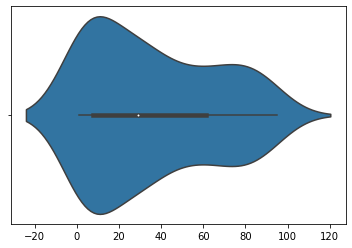

In [60]:
sns.violinplot(sp)

<function matplotlib.pyplot.show(*args, **kw)>

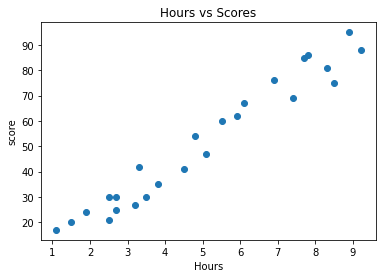

In [10]:
#pairwise correlation plots of numeric variables
plt.plot(sp['Hours'],sp['Scores'],'o')
plt.xlabel('Hours')
plt.ylabel('score')
plt.title('Hours vs Scores')
plt.show

In this plot we see positive linear relationship between Hours and Scores.In other words spending more Hours for study get higher Scores.


In [11]:
sp.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


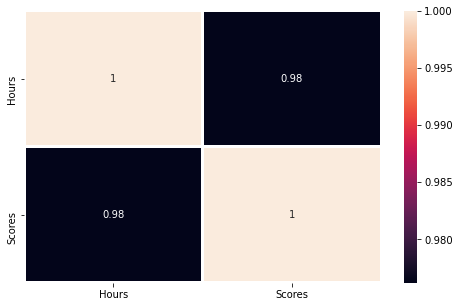

In [12]:
plt.figure(figsize=(8,5))

sns.heatmap(sp.corr(),annot=True,linewidth=2) #for color visualisation

# Regression with sci-kit learn

In [13]:
X = sp['Hours']

In [14]:
y = sp['Scores']

In [15]:
X = sp.iloc[:, :-1].values  
y = sp.iloc[:, 1].values  

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [17]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


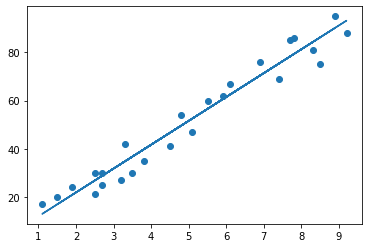

In [28]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [29]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [38]:
error = pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Absolute Error':abs(y_test-y_pred)})
error

,Actual,Predicted,Absolute Error
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


# What will be predicted score if a student studies for 9.25 hrs/ day

In [42]:
# You can also test with your own data
Hours = np.array([9.25]).reshape(-1,1)
own_pred = reg.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Scores = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Scores = 93.69173248737535


In [40]:
test_Hours = np.array([9.25]).reshape(-1,1)
pred_Scores = reg.predict(test_Hours)
print('The predicted percantage score of a student studying for 9.25 hours a day is {} %'.format(np.round(pred_Scores[0],2)))

The predicted percantage score of a student studying for 9.25 hours a day is 93.69 %


# Evaluating the model
#It helps to find the best model that represents our data and how well the chosen model will work in the future.
#For simplicity here, we have chosen the mean square error.

In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# With statsmodels

In [20]:
import statsmodels.formula.api as smapi
s1 = smapi.ols(formula='Scores~Hours',data=sp).fit()

In [21]:
s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           9.13e-17
Time:                        18:25:02   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this model we least squares method for minimize the error.

In [22]:
s1.predict()

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [23]:
k=s1.predict()

In [24]:
sp['predict'] = k
sp

,Hours,Scores,predict
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985
5,1.5,20,17.147378
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
9,2.7,25,28.878343


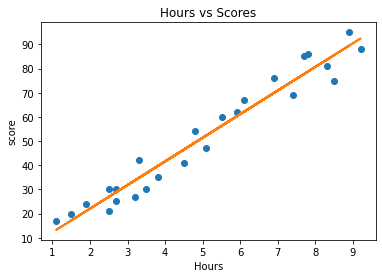

In [25]:
plt.plot(sp['Hours'],sp['Scores'],'o')
plt.plot(sp['Hours'],k,linewidth=2)

plt.xlabel('Hours')
plt.ylabel('score')
plt.title('Hours vs Scores')
plt.show()

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [26]:
sp[sp['Hours']==9.2]

,Hours,Scores,predict
6,9.2,88,92.421065


Here we see student get 92.42 Scores if studies 9.25 hrs/day.  